# Guía 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def Euler(a, b, N, F, X0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    X = np.zeros(t.size)
    X[0] = X0

    for i in range(N):
        X[i + 1] = X[i] + h * F(t[i], X[i])

    return t, X


def RungeKutta_vectorial(a, b, n, F, Y0):
    h = (b-a)/n
    t = np.linspace(a, b, n+1)

    k = Y0.shape[0]
    y = np.zeros((k, n+1)) # almaceno las soluciones en un vector de k filas (las k ecuaciones) y n+1 columnas (1 por cada salto en h)
                           # el (n+1) es porque incluye al 0
    y[:, 0] = Y0

    for i in range (1, n+1):
        K1 = F(t[i-1], y[:,i-1])
        K2 = F(t[i-1] + h, y[:, i-1] + h * K1)
        y[:, i] = y[:, i-1] + h * ((1/2)*K1 + (1/2)*K2)

    return t, y

## Ejercicio 1

El tiempo transcurrido desde el asesinato hasta que la temperatura era 37°C es aproximadamente -1.04 horas.


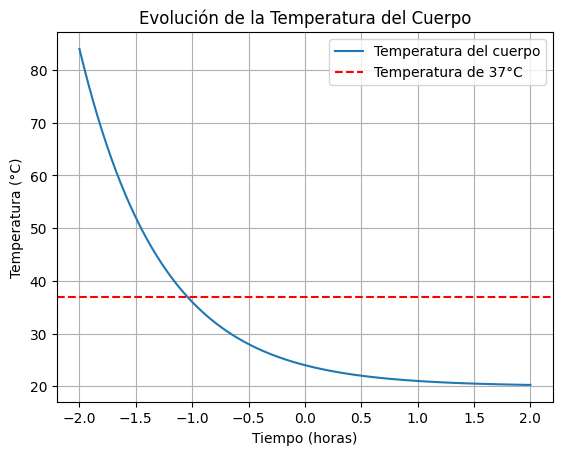

In [ ]:
# Parámetros
T_R = 20  # Temperatura ambiente
A = 4     # Constante A, obtenida de la condición inicial
beta = -np.log(4)  # Calculamos beta

# Función que da la temperatura en el tiempo t
def temperatura(t):
    return T_R + A * np.exp(beta * t)

# Calcular el tiempo cuando la temperatura es 37°C
T_objetivo = 37
t_objetivo = np.log((T_objetivo - T_R) / A) / beta

# Mostrar el resultado
print(f"El tiempo transcurrido desde el asesinato hasta que la temperatura era 37°C es aproximadamente {t_objetivo:.2f} horas.")

# Graficar la temperatura en función del tiempo
tiempos = np.linspace(-2, 2, 100)  # Generamos tiempos de 0 a 2 horas
temperaturas = temperatura(tiempos)  # Calculamos las temperaturas correspondientes

plt.plot(tiempos, temperaturas, label='Temperatura del cuerpo')
plt.axhline(y=T_objetivo, color='r', linestyle='--', label=f'Temperatura de {T_objetivo}°C')
plt.title("Evolución de la Temperatura del Cuerpo")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio 2

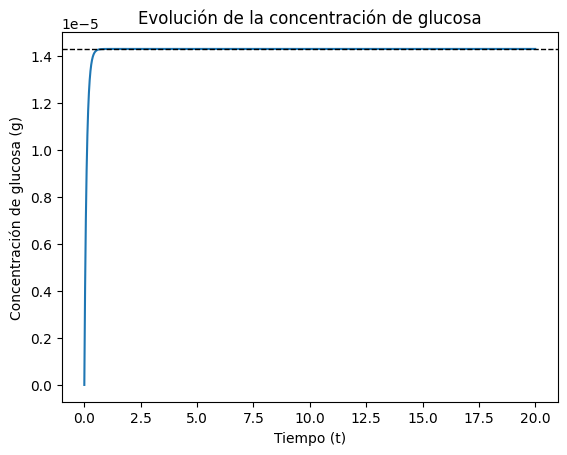

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def glucosa(t, g):
    return G/(100*V)-k*g

k = 10
G = 1
V = 70

a,b = 0, 20

t, Y = RungeKutta_vectorial(a, b, 10000, glucosa, np.array([0]))

plt.plot(t, Y[0,:])
plt.xlabel('Tiempo (t)')
plt.ylabel('Concentración de glucosa (g)')
plt.axhline(G/(100*V*k), color='black', linestyle='--', linewidth=1) # G/(100*V*k) es el pto de equilibrio
plt.title('Evolución de la concentración de glucosa')
plt.show()


## Ejercicio 3

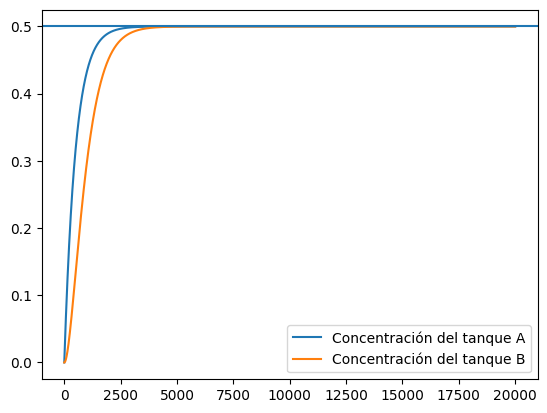

In [16]:
a, b = 0, 20000
v=0.2
m=0.1
V=100
def ej3(t, ab):
    a_, b_ = ab
    dAdt = m/V-v/V*a_
    dBdt = v/V*a_-v/V*b_
    return np.array([dAdt, dBdt])

ab_0 = np.array([0,0])

t, Sol = RungeKutta_vectorial(a, b, 10000, ej3, ab_0)
A, B = Sol

plt.plot(t, A, label='a(t)')
plt.plot(t, B, label='b(t)')
plt.legend(["Concentración del tanque A", "Concentración del tanque B"])
plt.axhline(m/v) # Siempre se estabiliza en m/v
plt.show()


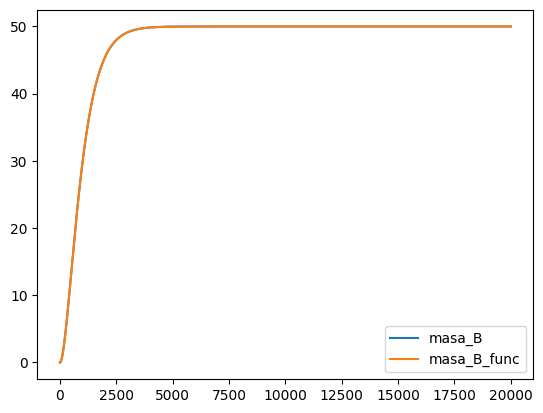

In [21]:
# Vemos lo de la masa de b

masa_B = V * B

masa_B_func = []
for t_ in t:
    masa_B_func.append(m*V/v*(1-np.e**(-v*t_/V))-m*t_*np.e**(-v*t_/V))

plt.plot(t, masa_B)
plt.plot(t, masa_B_func)
plt.legend(["masa_B", "masa_B_func"])
plt.show()


## Ejercicio 4

## Ejercicio 5

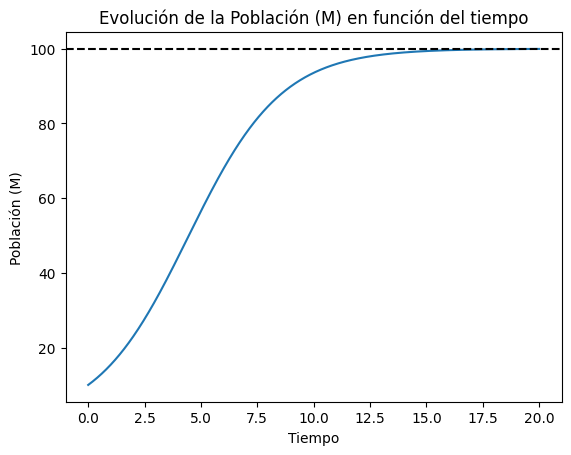

In [27]:
r = 0.5     # tasa de crecimiento (por día)
K = 100     # capacidad de carga (en gramos de biomasa)
a = 0.05    # constante de saturación
M0 = 10


def ej5(t, M):
    return r*M*((K-M)/(K+a*M))

t, Sol = Euler(0, 20, 1000, ej5, M0)

plt.plot(t, Sol)
plt.axhline(K, ls="--", color="black")
plt.title("Evolución de la Población (M) en función del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Población (M)")
plt.show()

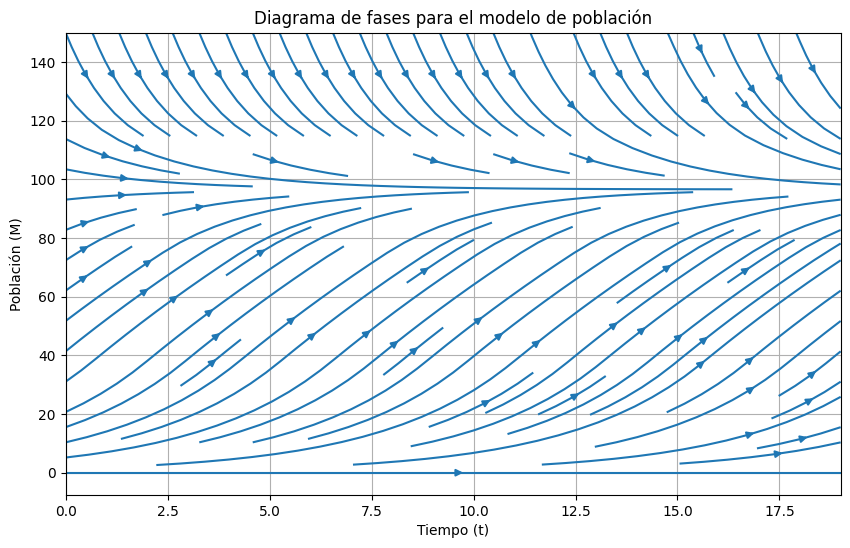

In [36]:
t_vals = np.arange(0, 20, 1)
M_vals = np.linspace(0, 150, 5)
T, M = np.meshgrid(t_vals, M_vals)

dM = ej5(T, M)
dT = np.ones_like(dM)

plt.figure(figsize=(10,6))
plt.streamplot(T, M, dT, dM)
plt.title("Diagrama de fases para el modelo de población")
plt.xlabel("Tiempo (t)")
plt.ylabel("Población (M)")
plt.grid(True)
plt.show()

## Ejercicio 6

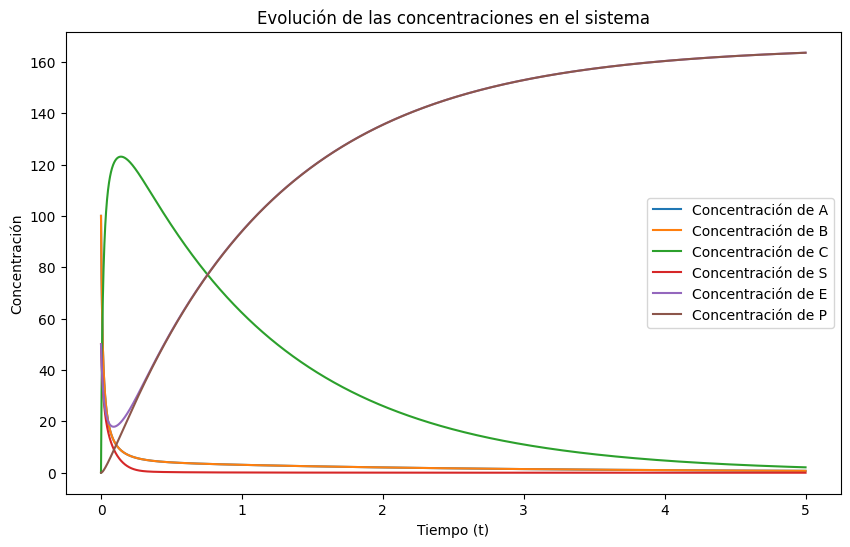

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parámetros
k1 = 0.8
k_1 = 0.1
k2 = 1

def sistema_reaccion(t, Y):
    A, B, C, S, E, P = Y
    dA_dt = -k1 * A * B + k_1 * C
    dB_dt = -k1 * A * B + k_1 * C
    dC_dt = k1 * A * B - k_1 * C - k2 * C + k1 * S * E
    dS_dt = -k1 * S * E + k_1 * C
    dE_dt = -k1 * S * E + k_1 * C + k2 * C
    dP_dt = k2 * C
    return np.array([dA_dt, dB_dt, dC_dt, dS_dt, dE_dt, dP_dt])


Y0 = np.array([100, 100, 0, 50, 50, 0])  # [A0, B0, C0, S0, E0, P0]

a, b = 0, 5  # tiempo de inicio y final
n = 5000  # número de pasos

# resolucion del sistema
t, Y = RungeKutta_vectorial(a, b, n, sistema_reaccion, Y0)

# gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, Y[0, :], label="Concentración de A")
plt.plot(t, Y[1, :], label="Concentración de B")
plt.plot(t, Y[2, :], label="Concentración de C")
plt.plot(t, Y[3, :], label="Concentración de S")
plt.plot(t, Y[4, :], label="Concentración de E")
plt.plot(t, Y[5, :], label="Concentración de P")
plt.xlabel('Tiempo (t)')
plt.ylabel('Concentración')
plt.legend()
plt.title('Evolución de las concentraciones en el sistema')
plt.show()


## Ejercicio 7

In [ ]:
mu = 0
def oscilador_armonico(t, Y):
    x, v = Y
    dxdt = v
    dvdt = -mu * v - 25 * x
    return np.array([dxdt, dvdt])

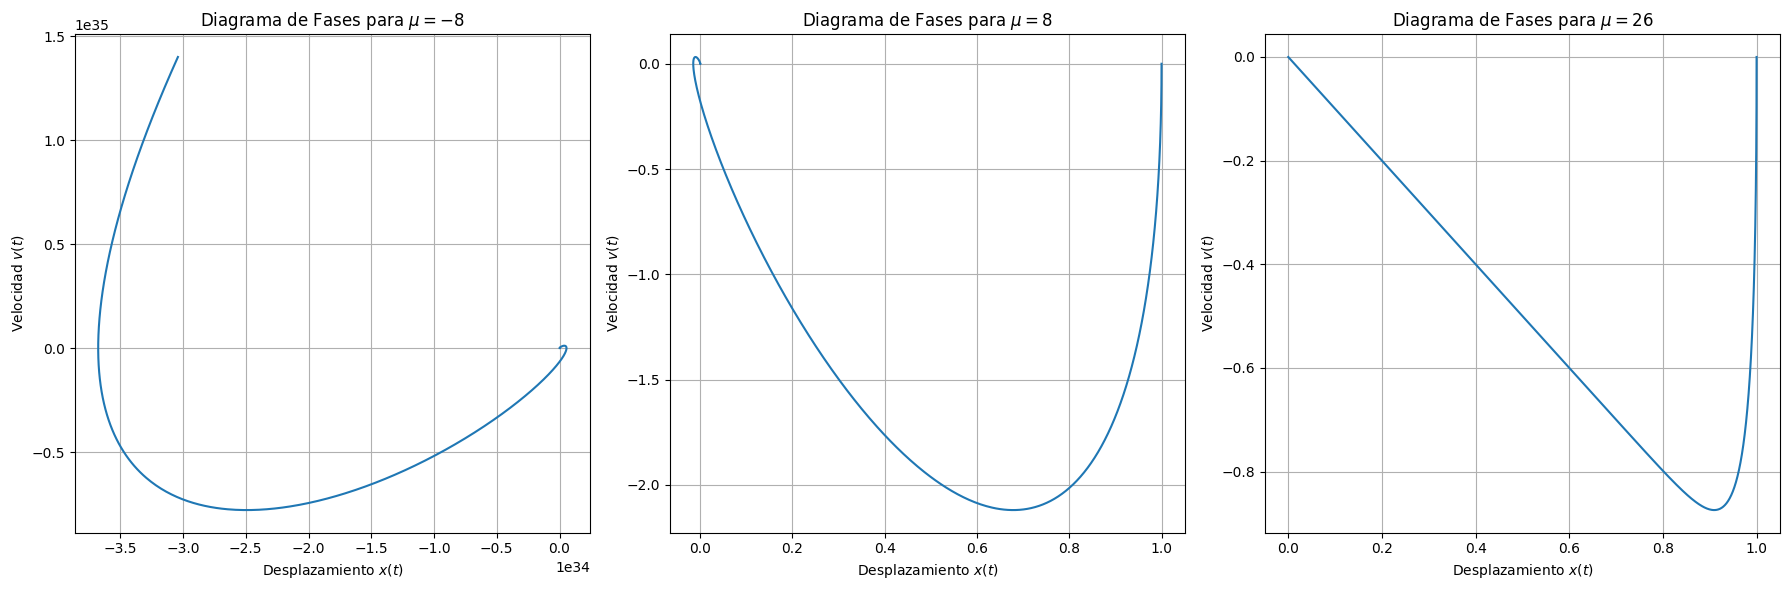

In [ ]:
mus = [-8, 8, 26]
Y0 = np.array([1, 0])
a, b = 0, 20
n = 10000

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, x in enumerate(mus):
    mu = x
    t, y = RungeKutta_vectorial(a, b, n, oscilador_armonico, Y0)

    axs[i].plot(y[0, :], y[1, :])
    axs[i].set_xlabel('Desplazamiento $x(t)$')
    axs[i].set_ylabel('Velocidad $v(t)$')
    axs[i].set_title(f'Diagrama de Fases para $\\mu = {mu}$')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

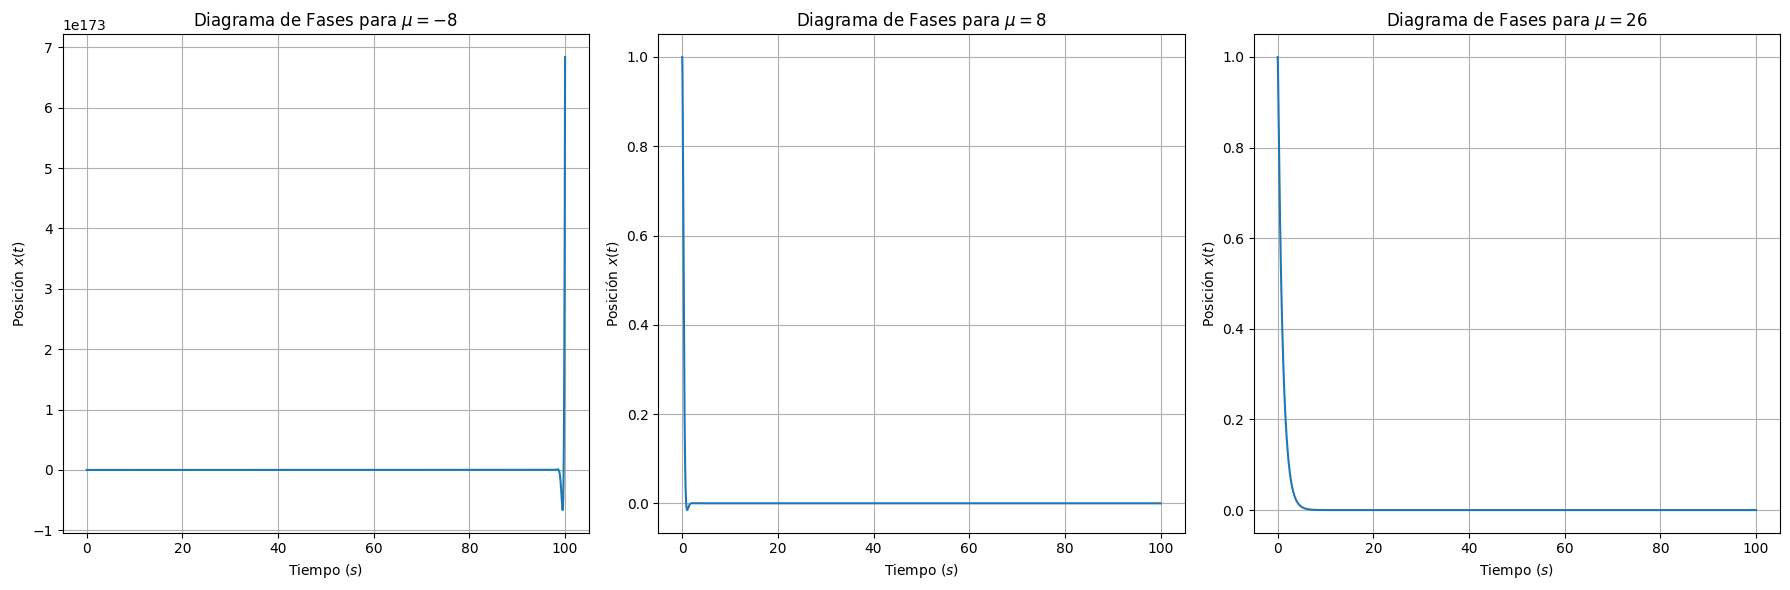

In [ ]:
mus = [-8, 8, 26]
Y0 = np.array([1, 0])
a, b = 0, 100
n = 100000

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, x in enumerate(mus):
    mu = x
    t, y = RungeKutta_vectorial(a, b, n, oscilador_armonico, Y0)

    axs[i].plot(t, y[0, :])
    axs[i].set_xlabel('Tiempo $(s)$')
    axs[i].set_ylabel('Posición $x(t)$')
    axs[i].set_title(f'Diagrama de Fases para $\\mu = {mu}$')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

## Ejercicio 8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def circuito_no_lineal(t, Y):
    x, y = Y
    dxdt = y
    dydt = -x + x**3 - (a0 + x) * y
    return np.array([dxdt, dydt])


In [ ]:
a_values = [0.5, -0.5]
Y0 = np.array([-2, -2])
a, b = 0, 0.5
n = 1000

[[ -2.          -2.00100113  -2.0020045  ...  -8.33727205  -8.37063137
   -8.40426704]
 [ -2.          -2.00450494  -2.00901979 ... -66.44565588 -66.99498265
  -67.55111044]]
[[  -2.           -2.00100137   -2.00200551 ...  -12.22439814
   -12.30050395  -12.37756205]
 [  -2.           -2.00550669   -2.0110268  ... -151.27676689
  -153.16384431 -155.08631856]]


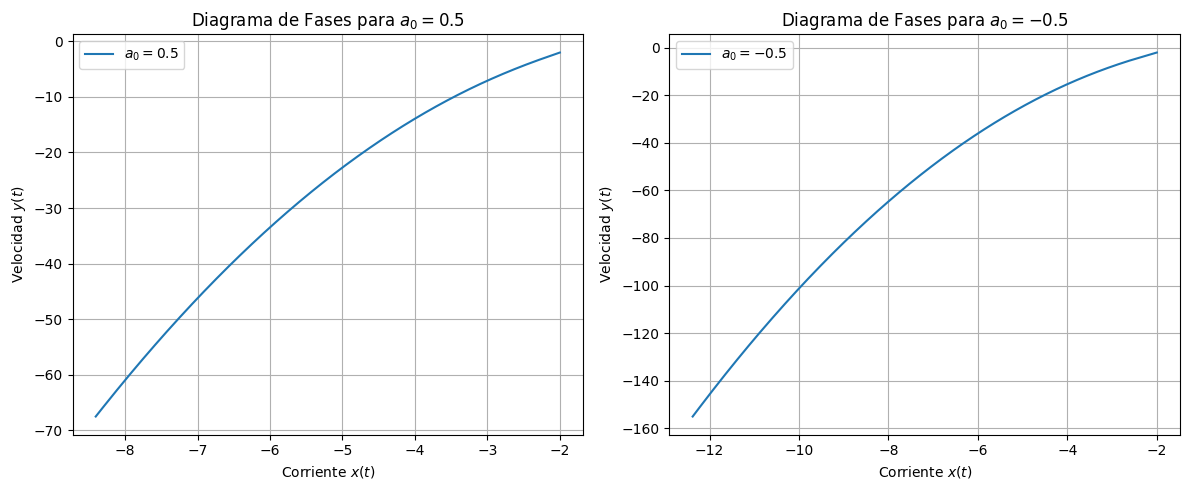

In [ ]:
plt.figure(figsize=(12, 5))

for i, x in enumerate(a_values):
    a0 = x
    t, Y = RungeKutta_vectorial(a, b, n, circuito_no_lineal, Y0)

    print(Y)
    plt.subplot(1, 2, i+1)
    plt.plot(Y[0, :], Y[1, :], label=f'$a_0 = {a0}$')
    plt.xlabel('Corriente $x(t)$')
    plt.ylabel('Velocidad $y(t)$')
    plt.title(f'Diagrama de Fases para $a_0 = {a0}$')
    plt.legend()
    plt.grid(True)


plt.tight_layout()
plt.show()

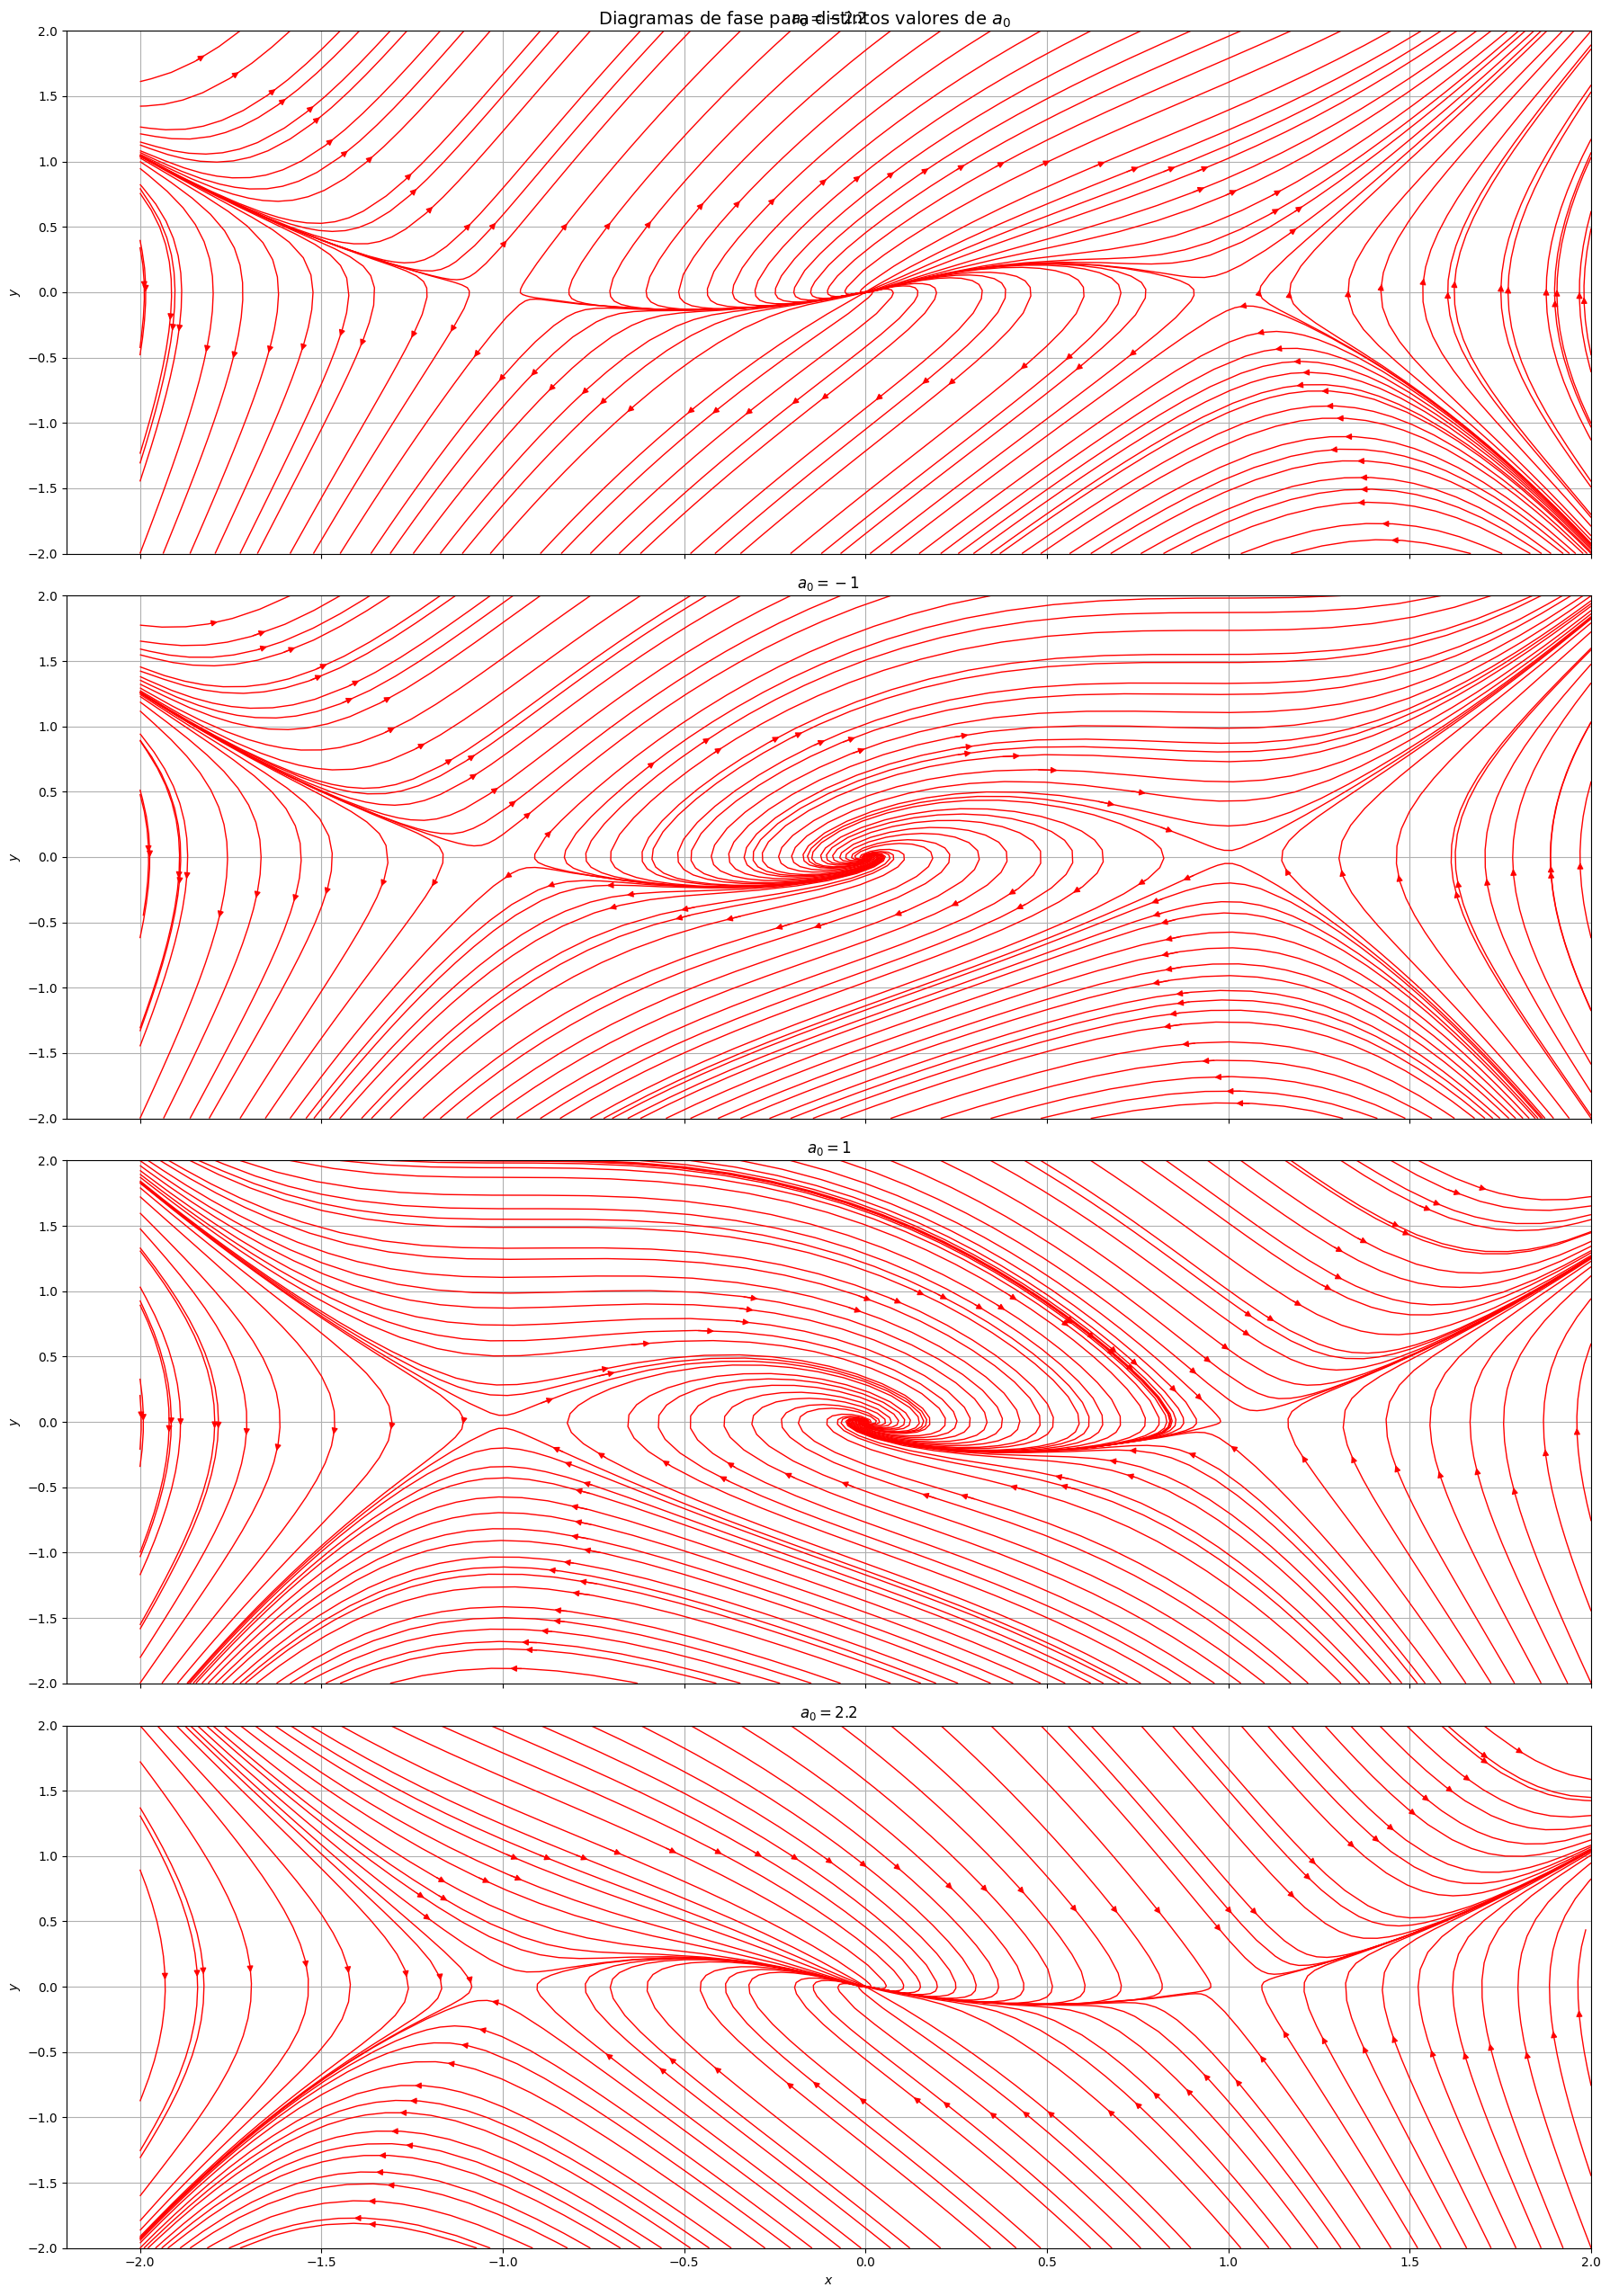

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def sistema(X, a0):
    x, y = X
    dxdt = y
    dydt = -x + x**3 - (a0 + x) * y
    return np.array([dxdt, dydt])

a0_values = [-2.2, -1, 1, 2.2]

x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_values, y_values)

fig, axes = plt.subplots(len(a0_values), 1, figsize=(18, 26), sharex=True)

for idx, a0 in enumerate(a0_values):
    dx, dy = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dXdt = sistema([X[i, j], Y[i, j]], a0)
            dx[i, j] = dXdt[0]
            dy[i, j] = dXdt[1]

    ax = axes[idx]
    ax.streamplot(X, Y, dx, dy, color='r', linewidth=1, broken_streamlines =False)
    ax.set_title(f"$a_0 = {a0}$")
    ax.set_ylabel("$y$")
    ax.grid(True)

axes[-1].set_xlabel("$x$")
plt.suptitle("Diagramas de fase para distintos valores de $a_0$", fontsize=14)
plt.tight_layout()
plt.show()

## Ejercicio 9

(100, 100)
(100, 100)
(100, 100)
(100, 100)
[[-2.         -1.93939394 -1.87878788 ...  3.87878788  3.93939394
   4.        ]
 [-2.         -1.93939394 -1.87878788 ...  3.87878788  3.93939394
   4.        ]
 [-2.         -1.93939394 -1.87878788 ...  3.87878788  3.93939394
   4.        ]
 ...
 [-2.         -1.93939394 -1.87878788 ...  3.87878788  3.93939394
   4.        ]
 [-2.         -1.93939394 -1.87878788 ...  3.87878788  3.93939394
   4.        ]
 [-2.         -1.93939394 -1.87878788 ...  3.87878788  3.93939394
   4.        ]]
[[-2.         -2.         -2.         ... -2.         -2.
  -2.        ]
 [-1.93939394 -1.93939394 -1.93939394 ... -1.93939394 -1.93939394
  -1.93939394]
 [-1.87878788 -1.87878788 -1.87878788 ... -1.87878788 -1.87878788
  -1.87878788]
 ...
 [ 3.87878788  3.87878788  3.87878788 ...  3.87878788  3.87878788
   3.87878788]
 [ 3.93939394  3.93939394  3.93939394 ...  3.93939394  3.93939394
   3.93939394]
 [ 4.          4.          4.         ...  4.          4.
   4

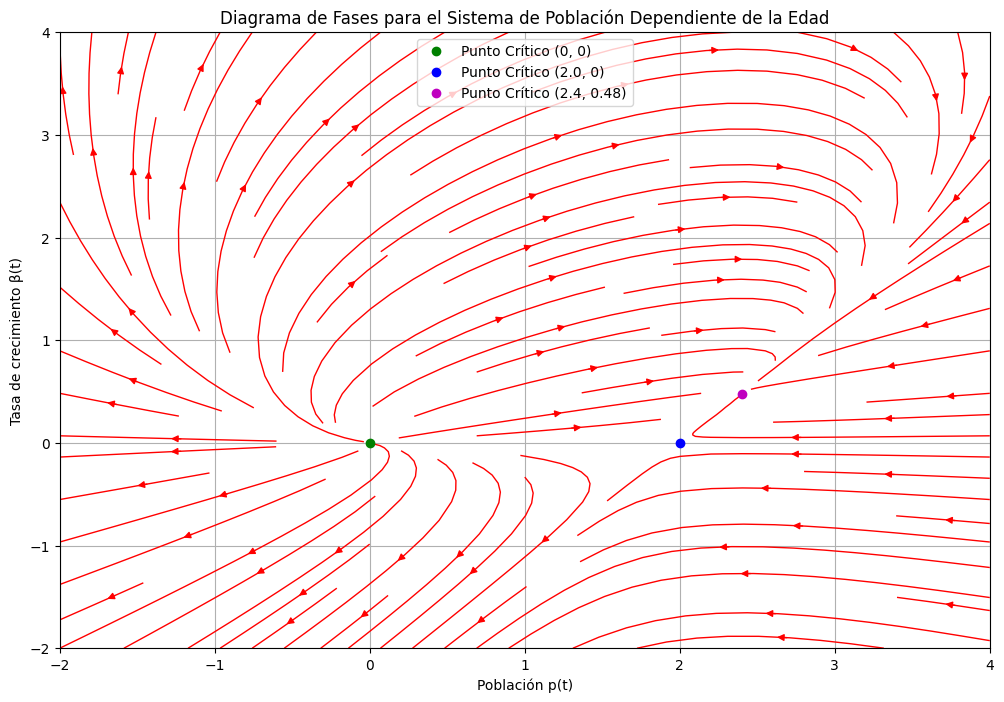

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sistema(p, beta, a, b, c):
    dpdt = beta + p * (a - b * p)
    dbetadt = beta * (c + (a - b * p))
    return np.array([dpdt, dbetadt])

# parámetros
a = 1
b = 0.5
c = 0.2

# ptos criticos
p1 = np.array([0, 0])
p2 = np.array([a / b, 0])
p3 = np.array([(a + c) / b, c * (a + c) / b])

p_values = np.linspace(-2, 4, 100)
beta_values = np.linspace(-2, 4, 100)

P, B = np.meshgrid(p_values, beta_values)
print(P.shape)
print(B.shape)
dx, dy = np.zeros(P.shape), np.zeros(B.shape)
print(dx.shape)
print(dy.shape)

# reemplazamos los valores en las ecuaciones diferenciales
for i in range(len(p_values)):
    for j in range(len(beta_values)):
        dpdt, dbetadt = sistema(P[i, j], B[i, j], a, b, c)
        dx[i, j] = dpdt
        dy[i, j] = dbetadt

print(P)
print(B)
print(dx)
print(dy)
# vemos como quedan los diagramas de fases
plt.figure(figsize=(12, 8))
plt.streamplot(P, B, dx, dy, color='r', linewidth=1)

# ptos criticos
plt.plot(p1[0], p1[1], 'go', label="Punto Crítico (0, 0)")
plt.plot(p2[0], p2[1], 'bo', label=f"Punto Crítico ({a/b}, 0)")
plt.plot(p3[0], p3[1], 'mo', label=f"Punto Crítico ({(a+c)/b}, {c*(a+c)/b})")


plt.xlabel("Población p(t)")
plt.ylabel("Tasa de crecimiento β(t)")
plt.title("Diagrama de Fases para el Sistema de Población Dependiente de la Edad")
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio 10

<ipython-input-7-2ba0a92d9295>:15: RuntimeWarning: invalid value encountered in sqrt
  p2 = np.array([np.sqrt(1-beta*alpha), alpha])


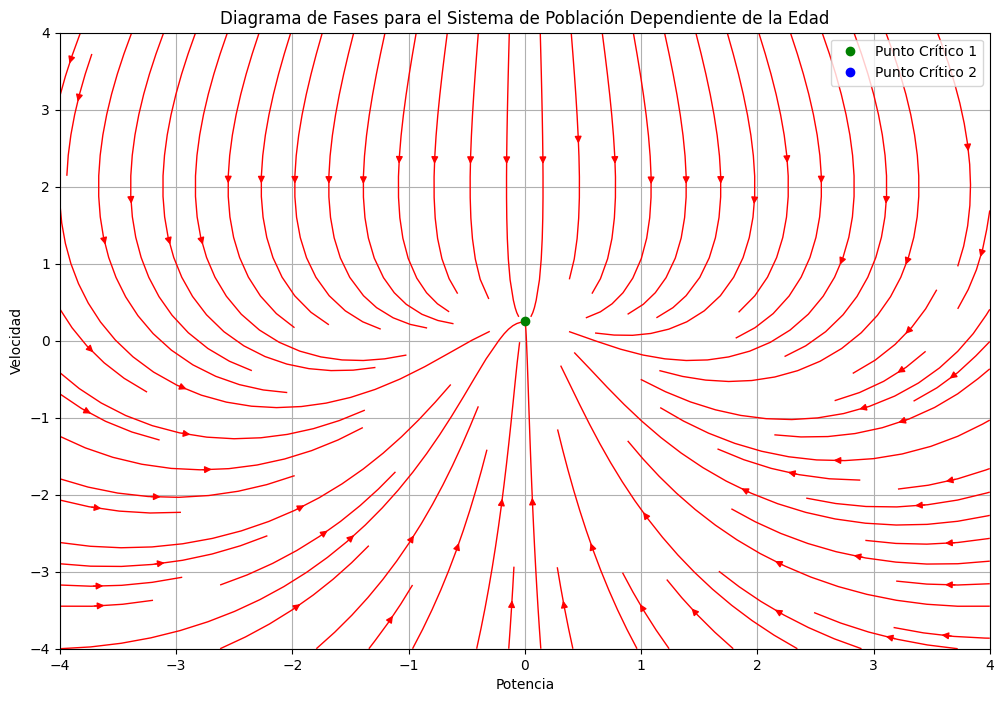

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sistema(p, v, alpha, beta):
    dpdt = - alpha * p + p * v
    dvdt = 1-beta *v- p**2
    return np.array([dpdt, dvdt])

# parámetros
alpha = 2
beta = 4

# ptos criticos
p1 = np.array([0, 1/beta])
p2 = np.array([np.sqrt(1-beta*alpha), alpha])

p_values = np.linspace(-4, 4, 200)
beta_values = np.linspace(-4, 4, 200)

P, B = np.meshgrid(p_values, beta_values)
dx, dy = np.zeros(P.shape), np.zeros(B.shape)

# reemplazamos los valores en las ecuaciones diferenciales
for i in range(len(p_values)):
    for j in range(len(beta_values)):
        dpdt, dvdt = sistema(P[i, j], B[i, j], alpha, beta)
        dx[i, j] = dpdt
        dy[i, j] = dvdt

# vemos como quedan los diagramas de fases
plt.figure(figsize=(12, 8))
plt.streamplot(P, B, dx, dy, color='r', linewidth=1)

# ptos criticos
plt.plot(p1[0], p1[1], 'go', label="Punto Crítico 1")
plt.plot(p2[0], p2[1], 'bo', label=f"Punto Crítico 2")


plt.xlabel("Potencia")
plt.ylabel("Velocidad")
plt.title("Diagrama de Fases para el Sistema de Población Dependiente de la Edad")
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 11

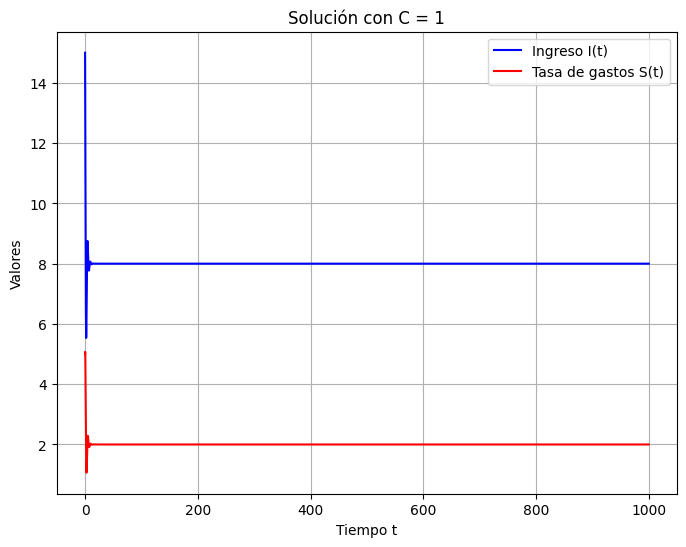

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

C = 2
K = 4
G0 = 4
I0 = 15
S0 = 5

Y0 = np.array([I0, S0])

def economia(t, Y):
    I, S = Y
    dIdt = I - K * S
    dSdt = I - C * S - G0
    return np.array([dIdt, dSdt])

def RungeKutta_vectorial(a, b, n, f, K0):
    h = (b-a) / n
    t = np.linspace(a,b, n+1)
    Y = np.zeros((len(K0), n+1))
    Y[:, 0] = K0

    for i in range(1, n+1):
        K1 = f(t[i-1], Y[:, i-1])
        K2 = f(t[i-1]+h, Y[:, i-1] + h * K1)
        Y[:, i] = Y[:, i-1] + h/2 * (K1 + K2)

    return t, Y

a, b = 0, 1000
n = 100000

t, y = RungeKutta_vectorial(a, b, n, economia, Y0)

plt.figure(figsize=(8, 6))
plt.plot(t, y[0, :], label="Ingreso I(t)", color="b")
plt.plot(t, y[1, :], label="Tasa de gastos S(t)", color="r")
plt.title("Solución con C = 1")
plt.xlabel("Tiempo t")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

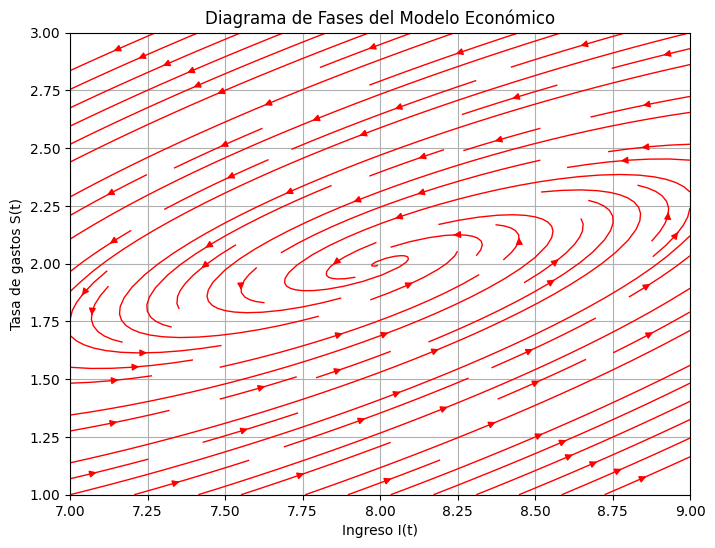

In [ ]:
I = np.linspace(7, 9, 100)
S = np.linspace(1, 3, 100)

I_grid, S_grid = np.meshgrid(I, S)
dI_grid, dS_grid = np.zeros(I_grid.shape), np.zeros(S_grid.shape)

for i in range (len(I)):
    for j in range (len(S)):
        dI, dS = economia(0, np.array([I_grid[i, j], S_grid[i, j]]))
        dI_grid[i, j] = dI
        dS_grid[i, j] = dS

plt.figure(figsize=(8, 6))
plt.streamplot(I_grid, S_grid, dI_grid, dS_grid, color='r', linewidth=1)
plt.xlabel("Ingreso I(t)")
plt.ylabel("Tasa de gastos S(t)")
plt.title("Diagrama de Fases del Modelo Económico")
plt.grid(True)
plt.show()

### Comportamiento del modelo económico

El sistema de ecuaciones diferenciales que describe el modelo económico es:


\begin{cases}
\dot{I} = I - K S \\
\dot{S} = I - C S - G_0
\end{cases}


Para distintos valores de \( K \) y \( C \), se observan diferentes comportamientos:

- **Si \( K < C \) (gasto mayor que inversión):**  
  El sistema crece exponencialmente, ya que el gasto no se reduce lo suficiente en relación con el ingreso.

- **Si \( K = C \):**  
  Se obtiene una solución lineal en la que el sistema se equilibra sin oscilaciones ni crecimiento exponencial.

- **Si \( K > C \) (inversión mayor que gasto):**  
  Aparecen oscilaciones amortiguadas o estabilidad, dependiendo de los parámetros iniciales.

Esto indica que el parámetro \( K \) cumple un rol clave en la estabilización del sistema:  
si la inversión responde de manera más fuerte que el gasto, el sistema tiende a regularse en el tiempo.

## Ejercicio 13

### Inciso 1

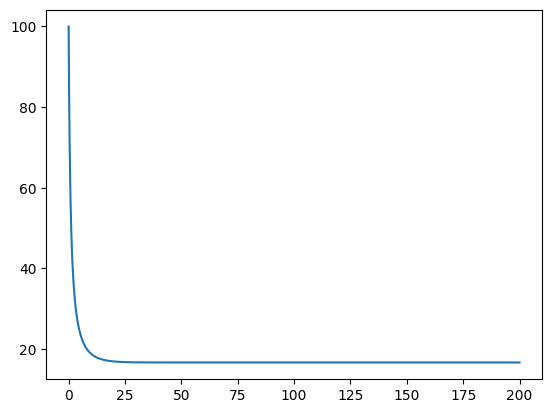

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def RungeKutta_vectorial(a, b, n, f, K0):
    h = (b-a) / n
    t = np.linspace(a,b, n+1)
    Y = np.zeros((len(K0), n+1))
    Y[:, 0] = K0

    for i in range(1, n+1):
        K1 = f(t[i-1], Y[:, i-1])
        K2 = f(t[i-1]+h, Y[:, i-1] + h * K1)
        Y[:, i] = Y[:, i-1] + h/2 * (K1 + K2)

    return t, Y


def ej13(t,N):
    return r*N*(1-N/K)-C*N

r = 1.2
K = 100
C = 1

t, Sol = RungeKutta_vectorial(0, 200, 1000, ej13, [100])

plt.plot(t, Sol[0])
plt.show()

### Inciso 2

<ipython-input-6-69b6630c0932>:28: RuntimeWarning: overflow encountered in multiply
  return r * N * (1 - N/K) - H0


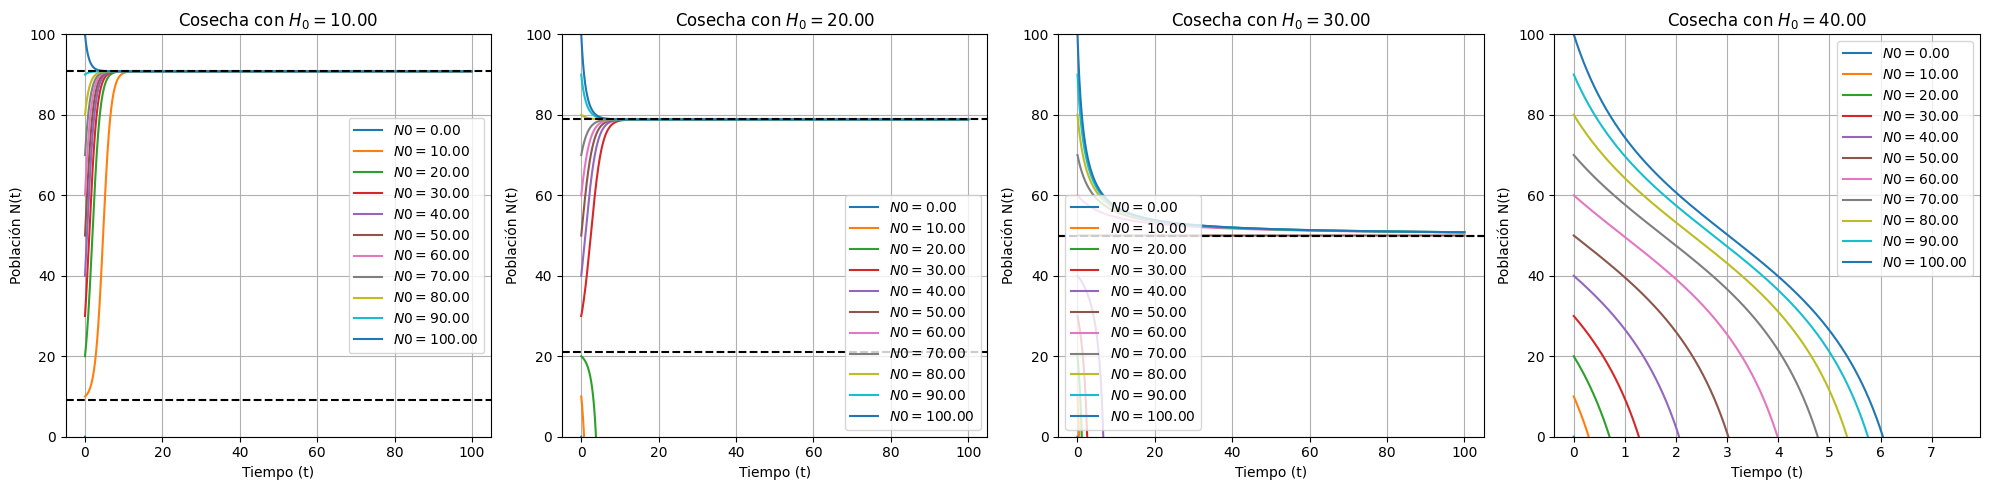

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def RungeKutta_vectorial(a, b, n, f, K0):
    h = (b-a) / n
    t = np.linspace(a,b, n+1)
    Y = np.zeros((len(K0), n+1))
    Y[:, 0] = K0

    for i in range(1, n+1):
        K1 = f(t[i-1], Y[:, i-1])
        K2 = f(t[i-1]+h, Y[:, i-1] + h * K1)
        Y[:, i] = Y[:, i-1] + h/2 * (K1 + K2)

    return t, Y

r = 1.2
K = 100
H0_valores = [10, r*K/4 - 10, r*K/4, r*K/4 + 10]
a, b = 0, 100
n = 50000

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, H0 in enumerate(H0_valores):
    def cosecha(t, N):
        return r * N * (1 - N/K) - H0
    a_ = -r / K
    b_ = r
    c_ = -H0
    D_ = b_**2 - 4 * a_ * c_
    if D_ >= 0:
        N1 = (-b_ + np.sqrt(D_)) / (2 * a_)
        N2 = (-b_ - np.sqrt(D_)) / (2 * a_)
    else:
        N1 = None
        N2 = None
    for n0 in range(0,101, 10):
        t, y = RungeKutta_vectorial(a, b, n, cosecha, [n0])
        axs[i].plot(t, y[0,:], label=f'$N0 = {n0:.2f}$')
        axs[i].set_ylim(0, 100)
        axs[i].set_xlabel('Tiempo (t)')
        axs[i].set_ylabel('Población N(t)')
        axs[i].set_title(f'Cosecha con $H_0 = {H0:.2f}$')
        axs[i].grid(True)
        axs[i].legend()
    if N1 is not None and N2 is not None:
        axs[i].axhline(N1, color='black', linestyle='--')
        axs[i].axhline(N2, color='black', linestyle='--')

plt.tight_layout()
plt.show()

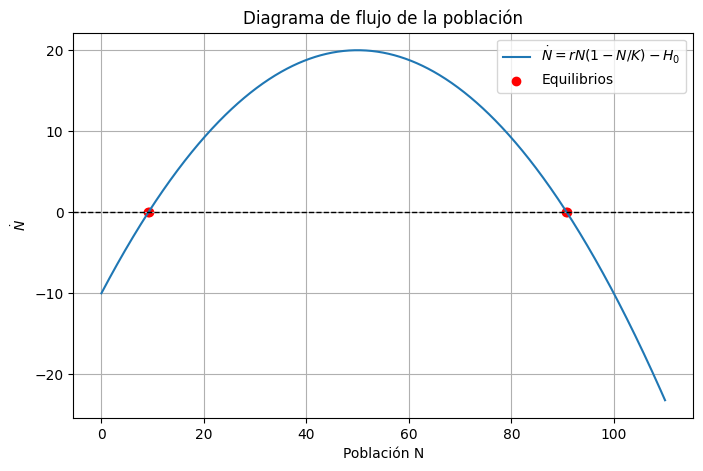

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r = 1.2
K = 100
H0 = 10

def dN_dt(N):
    return r * N * (1 - N / K) - H0

N_vals = np.linspace(0, 110, 1000)
dN_vals = dN_dt(N_vals)

equilibrios = [N for N in N_vals if np.isclose(dN_dt(N), 0, atol=0.1)]

plt.figure(figsize=(8, 5))
plt.plot(N_vals, dN_vals, label=r'$\dot{N} = rN(1 - N/K) - H_0$')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.scatter(equilibrios, [0] * len(equilibrios), color='red', label="Equilibrios")
plt.xlabel("Población N")
plt.ylabel(r"$\dot{N}$")
plt.title("Diagrama de flujo de la población")
plt.legend()
plt.grid()
plt.show()

Este gráfico explica por qué se va a 0 cuando empieza por debajo del punto de equilibrio más pequeño.

## Ejercicio 16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_ej16(mu):

    b = 6

    def ej16(t, XY):
        x, y = XY
        dxdt = x * (2 - x - y)
        dydt = y * (mu - y - mu**2 * x)
        return dxdt, dydt

    X_vals = np.linspace(0, b, 30)
    Y_vals = np.linspace(0, b, 30)
    X, Y = np.meshgrid(X_vals, Y_vals)

    dXdt = np.zeros_like(X)
    dYdt = np.zeros_like(Y)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dXdt[i, j], dYdt[i, j] = ej16(0, np.array([X[i, j], Y[i, j]]))

    if mu != 1.0: 
        x_eqs = [0, 2, 0 , (2-mu)/(1-mu**2)]
        y_eqs = [0, 0, mu, 2-((2-mu)/(1-mu**2))]
    else:
        x_eqs = [0, 2, 0]
        y_eqs = [0, 0, mu]

    for i in range(len(x_eqs)):
        print(x_eqs[i], y_eqs[i])

    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, dXdt, dYdt, density=1.5)
    plt.plot(x_eqs, y_eqs, 'ro', markersize=10)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Diagrama de fases para μ = {mu}")
    plt.xlim(0, b)
    plt.ylim(0, b)
    plt.grid(True)
    plt.show()  
    
    

interact(plot_ej16, mu=FloatSlider(min=0, max=4.0, step=0.1, value=0.0))

interactive(children=(FloatSlider(value=0.0, description='mu', max=4.0), Output()), _dom_classes=('widget-inte…

<function __main__.plot_ej16(mu)>

| Punto de equilibrio | Coordenadas                                                      | Condición sobre μ       | Naturaleza                                 |
|---------------------|------------------------------------------------------------------|--------------------------|---------------------------------------------|
| P₁                  | (0, 0)                                                           | Cualquier μ > 0          | Inestable                                   |
| P₂                  | (2, 0)                                                           | μ < ½                    | Punto silla                                 |
|                     |                                                                  | μ = ½                    | **Bifurcación** (autovalor 0, no hiperbólico) |
|                     |                                                                  | μ > ½                    | Estable (nodo o foco)                       |
| P₃                  | (0, μ)                                                           | μ < 2                    | Punto silla                                 |
|                     |                                                                  | μ = 2                    | **Bifurcación** (autovalor 0, no hiperbólico) |
|                     |                                                                  | μ > 2                    | Estable (nodo o foco)                       |
| P₄                  | ((2 − μ)/(1 − μ²), 2 − (2 − μ)/(1 − μ²))                         | μ ≠ 1, μ ≠ 2             | Depende de μ, analizar caso a caso          |


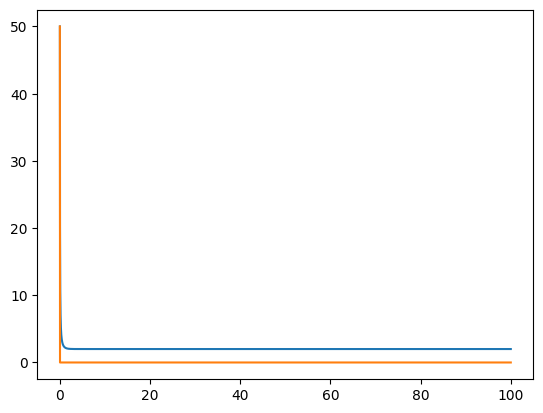

In [83]:
a, b = 0, 100
x0, y0 = 50, 50
mu = 4

def ej16(t, XY):
    x, y = XY
    dxdt = x * (2 - x - y)
    dydt = y * (mu - y - mu**2 * x)
    return np.array([dxdt, dydt]) 

t, Sol = RungeKutta_vectorial(a, b, 1000000, ej16, np.array([x0, y0]))

plt.plot(t, Sol[0])
plt.plot(t, Sol[1])
plt.show()

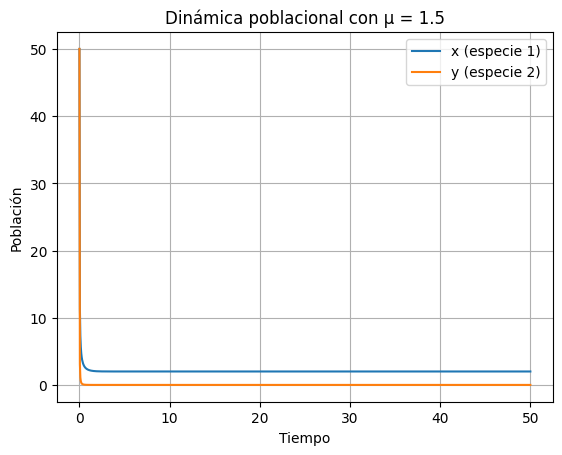

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

mu = 1.5

def ej16(XY, t):
    x, y = XY
    dxdt = x * (2 - x - y)
    dydt = y * (mu - y - mu**2 * x)
    return [dxdt, dydt]

# Condiciones iniciales
x0, y0 = 50, 50
XY0 = [x0, y0]

# Tiempo
t = np.linspace(0, 50, 1000)

# Resolución
sol = odeint(ej16, XY0, t)

# Gráfico
plt.plot(t, sol[:,0], label='x (especie 1)')
plt.plot(t, sol[:,1], label='y (especie 2)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title(f'Dinámica poblacional con μ = {mu}')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_ej17(epsilon):

    def ej17(t, XY):
        x, y = XY
        dXdt = x * (1 - y - epsilon * x)
        dYdt = y * (-1 + x - epsilon * y)
        return np.array([dXdt, dYdt])

    X_vals, Y_vals = np.linspace(0, 2, 100), np.linspace(0, 2, 100)
    X, Y = np.meshgrid(X_vals, Y_vals)

    dX, dY = np.zeros_like(X), np.zeros_like(Y)

    for i in range (X.shape[0]):
        for j in range (X.shape[1]):
            dX[i, j], dY[i, j] = ej17(t, np.array([X[i,j], Y[i,j]]))

    if epsilon != 0:
        x_eqs = [0, 0, 1/epsilon, (1+epsilon)/(1+epsilon**2)]
        y_eqs = [0, -1/epsilon, 0, 1-epsilon*(1+epsilon)/(1+epsilon**2)]
    
    else:
        x_eqs = [0, (1+epsilon)/(1+epsilon**2)]
        y_eqs = [0, 1-epsilon*(1+epsilon)/(1+epsilon**2)]

    plt.streamplot(X,Y,dX,dY, broken_streamlines=False)
    plt.xlabel("x (presa)")
    plt.ylabel("y (predador)")
    plt.title(f"Diagrama de fase del sistema predador-presa con ε = {epsilon}")
    plt.plot(x_eqs, y_eqs, 'ro', markersize=10)
    plt.ylim(0,2)
    plt.xlim(0,2)
    plt.grid(True)
    plt.show()

interact(plot_ej17, epsilon=FloatSlider(min=0, max=4.0, step=0.1, value=0.0))

interactive(children=(FloatSlider(value=0.0, description='epsilon', max=4.0), Output()), _dom_classes=('widget…

<function __main__.plot_ej17(epsilon)>

Pareciera que el punto $(\frac{1+\epsilon}{1+\epsilon^2}, 1-\epsilon \frac{1+\epsilon}{1+\epsilon^2})$ es el punto interesante a analizar ya que parece tener parte imaginaria siempre. Cuando $\epsilon = 0$, se ve que se forman órbitas cerradas, por lo que el comportamiento es cíclico. Al mover $\epsilon$, se puede ver que se forma un punto de equilibrio estable en forma de espiral, lo que hace que las poblaciones converjan a un valor en particular. Veamos esto graficando las solución exacta con odeint.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider

def plot_ej17_2(epsilon, x0, y0):
    
    def ej17(XY, t):
        x, y = XY
        dXdt = x * (1 - y - epsilon * x)
        dYdt = y * (-1 + x - epsilon * y)
        return [dXdt, dYdt]

    t = np.linspace(0, 50, 1000)

    XY0 = [x0, y0]

    sol = odeint(ej17, XY0, t)

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(t, sol[:, 0], label='x (presa)')
    plt.plot(t, sol[:, 1], label='y (predador)')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.title(f'Dinámica poblacional con ε = {epsilon:.2f}, x₀ = {x0:.2f}, y₀ = {y0:.2f}')
    plt.legend()
    plt.grid()
    plt.ylim(0, max(max(sol[:,0]), max(sol[:,1])) * 1.1)
    plt.show()

interact(plot_ej17_2,
         epsilon=FloatSlider(min=0.0, max=2.0, step=0.05, value=0.0, description='ε'),
         x0=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.5, description='x₀'),
         y0=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.5, description='y₀'));

interactive(children=(FloatSlider(value=0.0, description='ε', max=2.0, step=0.05), FloatSlider(value=1.5, desc…

Efectivamente, cuando movemos un poquito el parámetro $\epsilon$, aparecen los puntos de equilibrio estables que mencionamos previamente. Notar que, cuando $\epsilon = 0$ y ambas poblaciones son $1$, esto se mantiene constante para ambas poblaciones, ya que nos encontramos en el punto de equilibrio $(1,1)$ que encontramos en el desarrollo analítico. Finalmente, notar que, a medida que $\epsilon$ tiende a infinito, el punto de equilibrio de $y$ (presa) tiende a $0$. Esto último se observa dejando las variables $x_{0}$ e $y_{0}$ quietas y aumentando el parámetro $\epsilon$. El punto de equilibrio de $x$ también tiende a $0$, pero más lentamente.

### Ejercicio 19

In [1]:
def ej19(t, XY):
    X, Y = XY
    dXdt = Y
    dYdt = X**3-X
    return np.array([dXdt, dYdt])

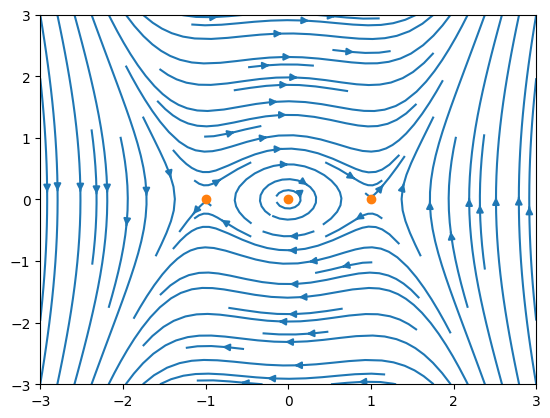

In [11]:
X_vals, Y_vals = np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X_vals, Y_vals)

dX, dY = np.zeros_like(X), np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dX[i, j], dY[i,j] = ej19(0, np.array([X[i, j], Y[i, j]]))

x_eqs = [0, 1, -1]
y_eqs = [0, 0, 0]
plt.streamplot(X, Y, dX, dY)
plt.plot(x_eqs, y_eqs, linestyle='', marker ='o')
plt.show()